# Aprendizaje Supervisado
## Clasificación

Para poder enteder mejor los algortimos de Machine Learning se trabajará con datos de uno o dos dimensiones (una o dos características). Sin embargo, se dene tener en cuenta que en la práctica se suelen usar muchas más características.

Se iniciará con un problema de clasificación binaria con dos dimensiones. Se usarán los datos sintéticos de la funcipon **make_blobs**.

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def plot_2d_separator(classifier, X, fill=False, ax=None, eps=None):
    if eps is None:
        eps = X.std() / 2.
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 100)
    yy = np.linspace(y_min, y_max, 100)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0]
        fill_levels = [decision_values.min(), 0, decision_values.max()]
    except AttributeError:
        # no decision_function
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5]
        fill_levels = [0, .5, 1]

    if ax is None:
        ax = plt.gca()
    if fill:
        ax.contourf(X1, X2, decision_values.reshape(X1.shape),
                    levels=fill_levels, colors=['blue', 'red'])
    else:
        ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels,
                   colors="black")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=2, random_state=0)

print(f"X: n_muestras {X.shape[0]}, n_caracteristicas {X.shape[1]}")
print(f"y: n_muestras {y.shape[0]}")

X: n_muestras 100, n_caracteristicas 2
y: n_muestras 100


In [5]:
print(f"5 primeras muestras: \n{X[:5, :]}")
print(f"\n5 primeras etiquetas: \n{y[:5, np.newaxis]}")

5 primeras muestras: 
[[ 4.21850347  2.23419161]
 [ 0.90779887  0.45984362]
 [-0.27652528  5.08127768]
 [ 0.08848433  2.32299086]
 [ 3.24329731  1.21460627]]

5 primeras etiquetas: 
[[1]
 [1]
 [0]
 [0]
 [1]]


Se representan las características en un sistema coordenado X,Y.

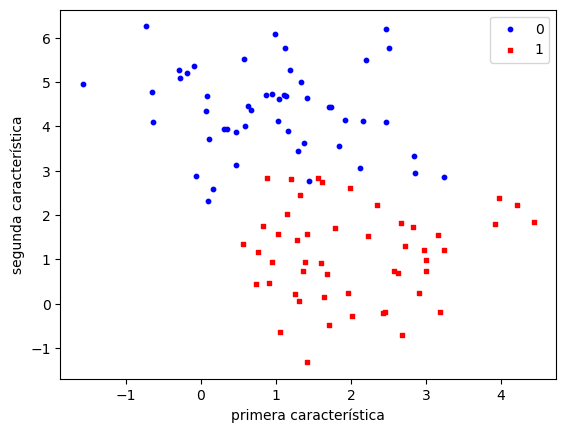

In [6]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], 
            c='blue', s=10, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], 
            c='red', s=10, label='1', marker='s')

plt.xlabel('primera característica')
plt.ylabel('segunda característica')
plt.legend(loc='upper right');

La tarea a realizar en este caso es una clasificación supervisada. Se dividirán los datos en dos partes:

- Conjunto de entrenamiento: usado para ajustar los parámetros del modelo.
- Conjunto de test: usado para evaluar la capacidad de generalización del modelo.

Se usará la función **train_test_split** del paquete **model_selection** de **sklearn**. Se particionarán los datos en 75% para train y 25% para test.

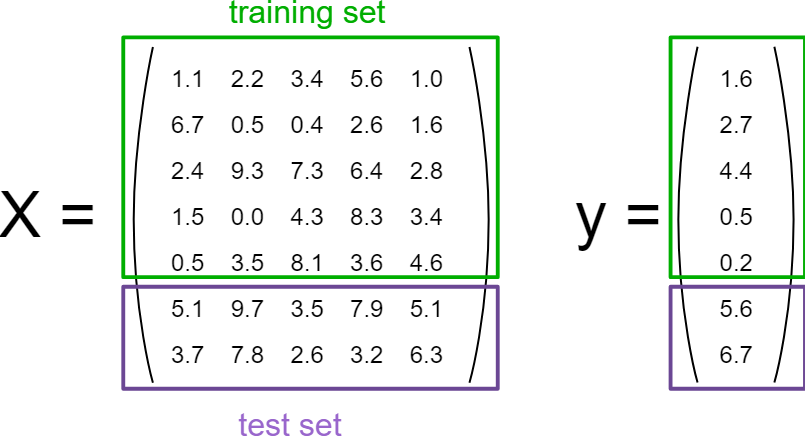

---

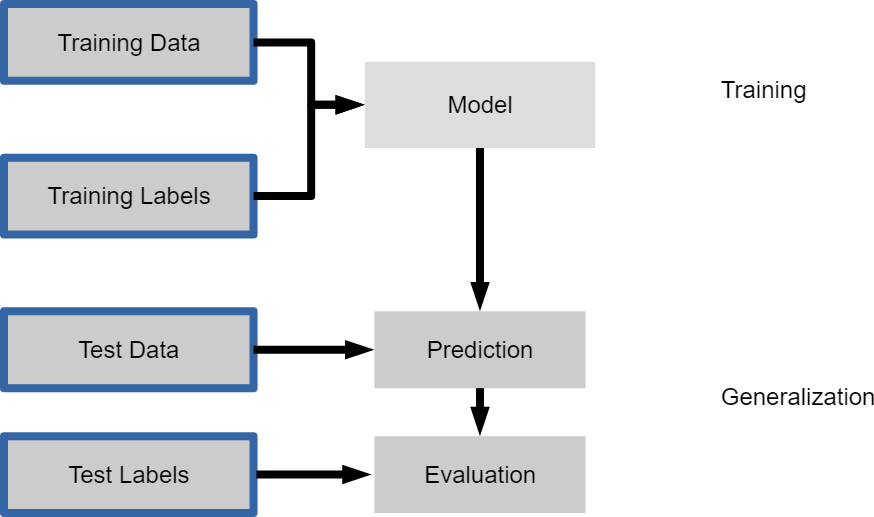

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234, stratify=y)

### Estimadores

Los algortimos de scikit-learn se trabajan con una interfaz llamada "Estimador". Se iniciará con el estimado de **Regresión Logística*.

In [19]:
from sklearn.linear_model import LogisticRegression

Se crea la instancia del estimador. 

In [28]:
clasificador = LogisticRegression()
print(X_train.shape)
print(y_train.shape)

(75, 2)
(75,)


Para entrenar el modelo con los datos del conjunto Train usaremos el método **fit**.

In [29]:
clasificador.fit(X_train, y_train)

LogisticRegression()

Para obtener los parámetros del estimador se usará el método **get_params()**.

In [30]:
clasificador.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Para predecir la respuesta estimada con nuevos datos se usa el método **predict**.

In [31]:
prediccion = clasificador.predict(X_test)

Al revisar las predicciones se observa:

In [32]:
print(prediccion)
print(y_test)

[1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0]
[1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0]


En Machine Learning se suele evaluar el modelo usando el **accuracy**.

In [33]:
np.mean(prediccion == y_test)

0.84

In [34]:
prediccion == y_test

array([ True, False,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True])

Dentro de scikit-learn, todos los clasificadores tienen el método **score**. Este devuelve la medida de rendimiento a partir de los datos Test (**accuracy**).

In [35]:
clasificador.score(X_test, y_test)

0.84

En recomendable medir el rendimiento de los conjuntos de Train y Test.

In [37]:
clasificador.score(X_train, y_train)

0.9733333333333334

<div class="alert alert-info">
    LogisticRegression es un modelo lineal, lo que significa que creará una frontera de decisión. En 2D, esto quiere decir que generará una línea recta para separar los puntos azules de los rojos:
</div>

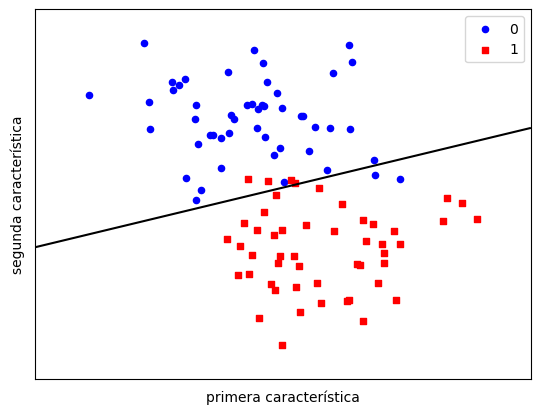

In [39]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], 
            c='blue', s=20, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], 
            c='red', s=20, label='1', marker='s')


plt.xlabel("primera característica")
plt.ylabel("segunda característica")
plot_2d_separator(clasificador, X)
plt.legend(loc='upper right');

**Parámetros Estimados:** Son atributos del estimador cuyo nombre termina en **_ (guión bajo)**. Para la Regresión Logística, los parámetros entrenables son los coeficientes y la coordenada en el origen de la línea.

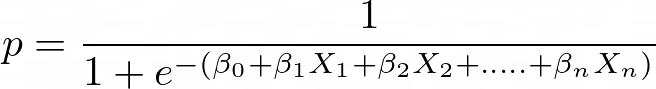

In [40]:
print(clasificador.coef_)
print(clasificador.intercept_)

[[ 0.87015709 -2.23877721]]
[4.64737766]


### K Nearest Neighbors (KNN)

Implementa una estrategia simple, cuando se le presenta un ejemplo desconocido, busca en la base de datos de referencia (entrenamiento) aquellos ejemplos que tengan características similares y le asigna la clase predominante.


In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
knn = KNeighborsClassifier(n_neighbors=70)

In [49]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=70)

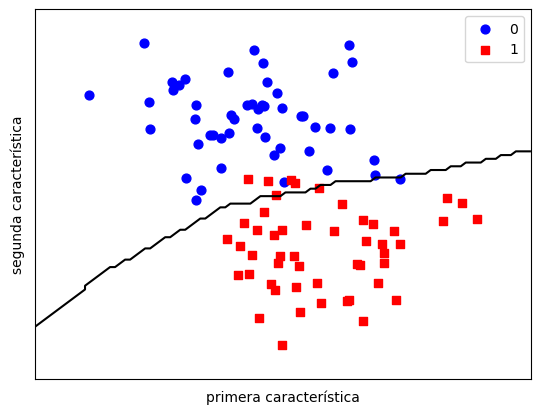

In [50]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], 
            c='blue', s=40, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], 
            c='red', s=40, label='1', marker='s')

plt.xlabel("primera característica")
plt.ylabel("segunda característica")
plot_2d_separator(knn, X)
plt.legend(loc='upper right');

In [51]:
knn.score(X_test, y_test)

0.88

<div class="alert alert-success">
    Construya un modelo usando KNN para el dataset de Iris. Cambie los valores de <b>n_neighbors</b> y compare el score de train y test.    
</div>

In [ ]:
# Carga del dataset desde scikit-learn

In [ ]:
# Separar el dataset en Train y Test

In [ ]:
# Instancear el Estimador con el parámetro n_neighbors

In [ ]:
# Entrenar el modelo

In [ ]:
# Mostrar el Score de Train y Test

In [ ]:
# Graficar